# ZOMATO BANGALORE RESTURANT

## Dataset and Focus

Zomato is one of the best online food delivery apps which gives the users the ratings and the reviews on restaurants all over india.These ratings and the Reviews are considered as one of the most important deciding factors which determine how good a restaurant is.

We will therefore use the real time Data set with variuos features a user would look into regarding a restaurant. We will be considering Banglore City in this analysis.

Content The basic idea of analyzing the Zomato dataset is to get a fair idea about the factors affecting the establishment of different types of restaurant at different places in Bengaluru, aggregate rating of each restaurant, Bengaluru being one such city has more than 12,000 restaurants with restaurants serving dishes from all over the world.

With each day new restaurants opening the industry has’nt been saturated yet and the demand is increasing day by day. Inspite of increasing demand it however has become difficult for new restaurants to compete with established restaurants. Most of them serving the same food. Bengaluru being an IT capital of India. Most of the people here are dependent mainly on the restaurant food as they don’t have time to cook for themselves.

With such an overwhelming demand of restaurants it has therefore become important to study the demography of a location. What kind of a food is more popular in a locality. Do the entire locality loves vegetarian food. If yes then is that locality populated by a particular sect of people for eg. Jain, Marwaris, Gujaratis who are mostly vegetarian. These kind of analysis can be done using the data, by studying the factors such as

        • Location of the restaurant

        • Approx Price of food

        • Theme based restaurant or not

        • Which locality of that city serves that cuisines with maximum number of restaurants

        • The needs of people who are striving to get the best cuisine of the neighborhood

        • Is a particular neighborhood famous for its own kind of food.


“Just so that you have a good meal the next time you step out”

The data is accurate to that available on the zomato website until 15 March 2019. The data was scraped from Zomato in two phase. After going through the structure of the website I found that for each neighborhood there are 6-7 category of restaurants viz. Buffet, Cafes, Delivery, Desserts, Dine-out, Drinks & nightlife, Pubs and bars.

Phase I,

In Phase I of extraction only the URL, name and address of the restaurant were extracted which were visible on the front page. The URl's for each of the restaurants on the zomato were recorded in the csv file so that later the data can be extracted individually for each restaurant. This made the extraction process easier and reduced the extra load on my machine. The data for each neighborhood and each category can be found here

Phase II,

In Phase II the recorded data for each restaurant and each category was read and data for each restaurant was scraped individually. 15 variables were scraped in this phase. For each of the neighborhood and for each category their onlineorder, booktable, rate, votes, phone, location, resttype, dishliked, cuisines, approxcost(for two people), reviewslist, menu_item was extracted. See section 5 for more details about the variables.

Acknowledgements The data scraped was entirely for educational purposes only. Note that I don’t claim any copyright for the data. All copyrights for the data is owned by Zomato Media Pvt. Ltd..

        Source: Kaggle
#### Main Objective:

The main agenda of this project is:

    * Perform extensive Exploratory Data Analysis(EDA) on the Zomato Dataset.

    * Build an appropriate Machine Learning Model that will help various Zomato Restaurants to predict their respective Ratings based on certain features

    * DEPLOY the Machine learning model via Flask that can be used to make live predictions of restaurants ratings

A step by step guide is attached to this documnet as well as a video explanation of each concpet.



## Libraries

In [88]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.metrics import r2_score

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## Importing the Dataset

In [89]:
zomato = pd.read_csv('Zomato.csv')
zomato.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [90]:
zomato.shape

(51717, 17)

## Exploratory Data Analysis (EDA)

#### Dataset Columns

In [91]:
zomato.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [92]:
zomato = zomato.rename(columns = {'approx_cost(for two people)':'cost', 'listed_in(type)':'type','listed_in(city)':'city'})

#### Finding if any duplicates row present in our dataset

In [93]:
print('Number of duplicate rows present in dataset = ',zomato.duplicated().sum())

Number of duplicate rows present in dataset =  0


#### Finding number of null values present in our dataset

In [94]:
zomato.isnull().sum()

url                 0
address             0
name                0
online_order        0
book_table          0
rate             7775
votes               0
phone            1208
location           21
rest_type         227
dish_liked      28078
cuisines           45
cost              346
reviews_list        0
menu_item           0
type                0
city                0
dtype: int64

#### Finding a brief infor for our dataset

In [95]:
zomato.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   url           51717 non-null  object
 1   address       51717 non-null  object
 2   name          51717 non-null  object
 3   online_order  51717 non-null  object
 4   book_table    51717 non-null  object
 5   rate          43942 non-null  object
 6   votes         51717 non-null  int64 
 7   phone         50509 non-null  object
 8   location      51696 non-null  object
 9   rest_type     51490 non-null  object
 10  dish_liked    23639 non-null  object
 11  cuisines      51672 non-null  object
 12  cost          51371 non-null  object
 13  reviews_list  51717 non-null  object
 14  menu_item     51717 non-null  object
 15  type          51717 non-null  object
 16  city          51717 non-null  object
dtypes: int64(1), object(16)
memory usage: 6.7+ MB


#### Insight:
##### We can see only one column is with int dtype and others are in object. Let's correct these to get better analysis.
##### Let's start with cost column 


In [96]:
zomato.cost.unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1,200', '350', '250',
       '950', '1,000', '1,500', '1,300', '199', '80', '1,100', '160',
       '1,600', '230', '130', '50', '190', '1,700', nan, '1,400', '180',
       '1,350', '2,200', '2,000', '1,800', '1,900', '330', '2,500',
       '2,100', '3,000', '2,800', '3,400', '40', '1,250', '3,500',
       '4,000', '2,400', '2,600', '120', '1,450', '469', '70', '3,200',
       '60', '560', '240', '360', '6,000', '1,050', '2,300', '4,100',
       '5,000', '3,700', '1,650', '2,700', '4,500', '140'], dtype=object)

In [97]:
zomato.cost = zomato.cost.astype('str')
zomato.cost = zomato.cost.apply( lambda x: x.replace(',',''))

In [98]:
zomato.cost = zomato.cost.astype('float')

In [99]:
zomato.cost = zomato.cost.fillna(value = zomato.cost.mean())

#### Simillary correcting the rate column

In [100]:
zomato.rate.unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [101]:
zomato = zomato[zomato.rate != 'NEW']
zomato = zomato[zomato.rate != '-']

In [102]:
zomato.rate = zomato.rate.astype('str')
zomato.rate = zomato.rate.apply(lambda x: x.replace('/5',''))

In [103]:
zomato.rate = zomato.rate.astype('float')
zomato.rate = zomato.rate.fillna(value = zomato.rate.mean())

In [104]:
zomato = zomato.dropna(subset=['cuisines'])

## Data Visualization

#### Finding the number of resturants in different locations of Bangalore

<AxesSubplot:xlabel='city'>

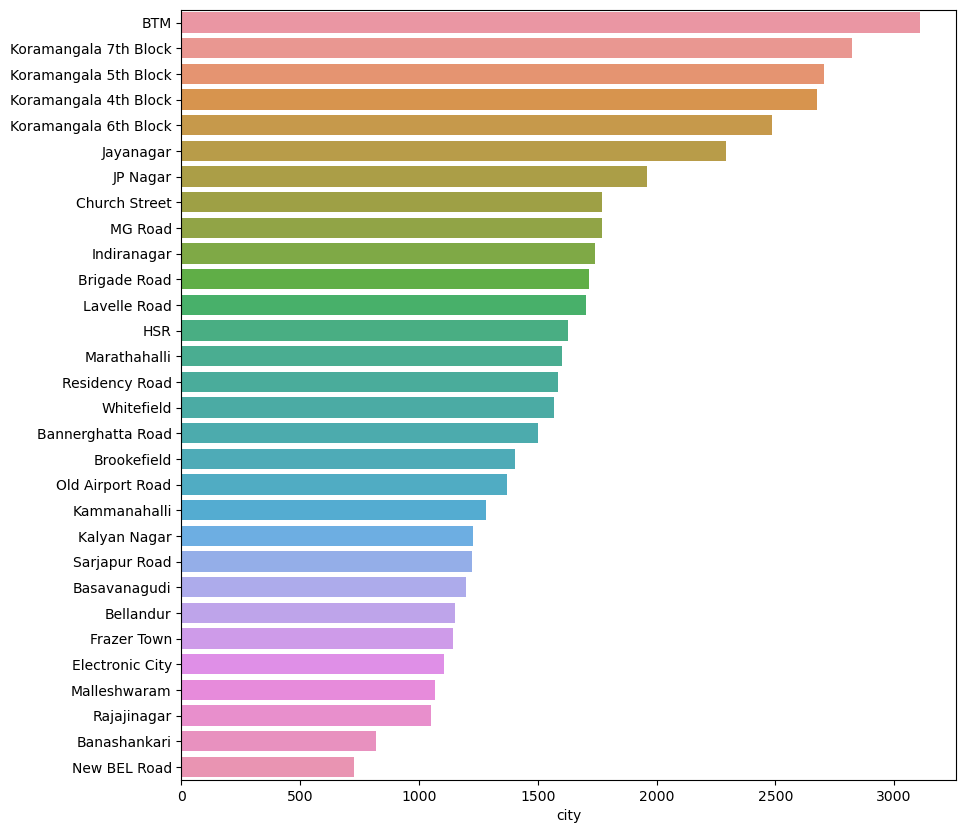

In [105]:
fig=plt.figure(figsize=(10,10))
sns.barplot(y=zomato['city'].value_counts().index,x=zomato['city'].value_counts())

#### Finding top 20 city with having more resturants

<AxesSubplot:xlabel='city'>

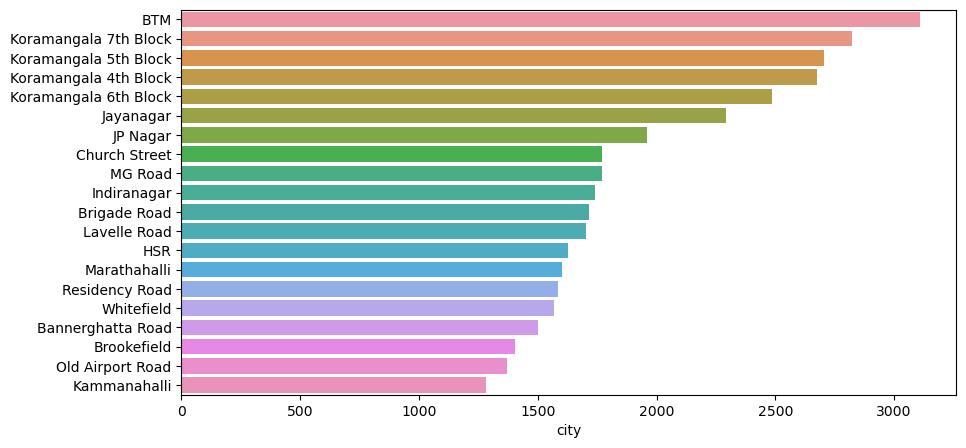

In [106]:
fig=plt.figure(figsize=(10,5))
sns.barplot(y=zomato['city'].value_counts()[0:20].index,x=zomato['city'].value_counts()[0:20])

#### Top 20 votes resturants name

<BarContainer object of 10 artists>

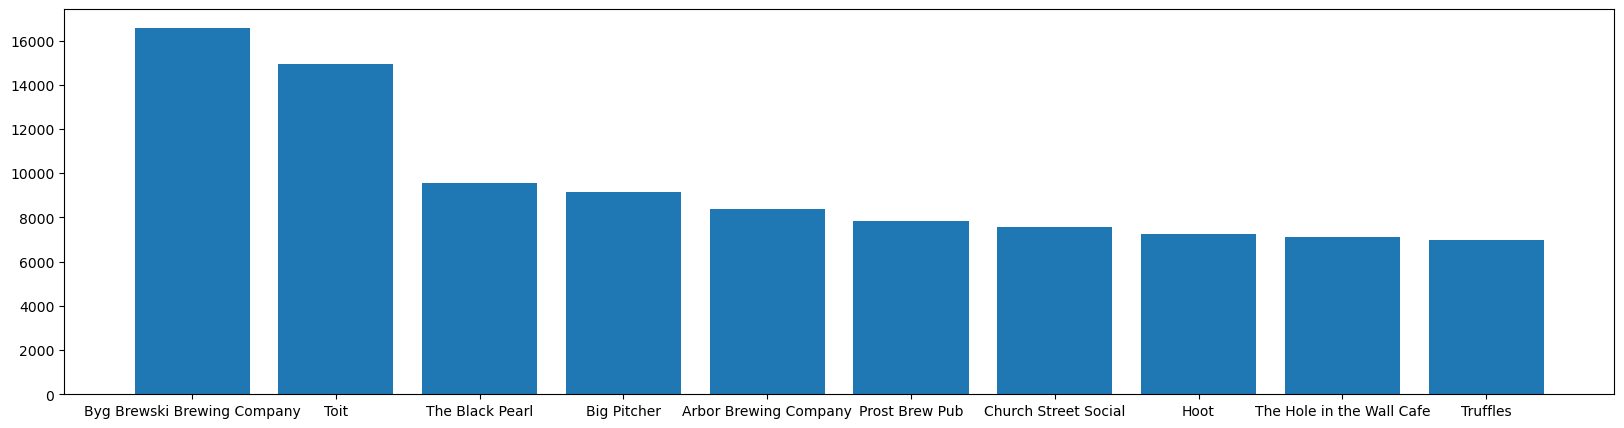

In [107]:
fig=plt.figure(figsize=(20,5))
Top20_vote = zomato[['name','votes']].groupby('name').mean()
top20_sorted = Top20_vote['votes'].sort_values(ascending=False)[0:10]
plt.bar(x=top20_sorted.index,height=top20_sorted)

#### Resturants are having online booking facility

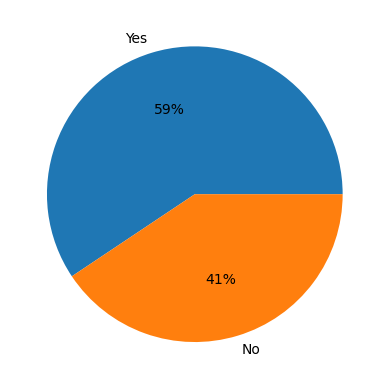

In [108]:
plt.pie(zomato['online_order'].value_counts(),labels =zomato['online_order'].unique(),autopct='%.0f%%' )
plt.show()

#### Resturants are having table booking facility

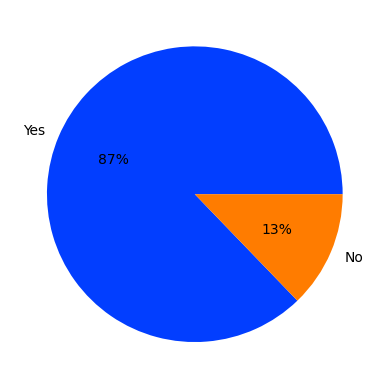

In [109]:
colors = sns.color_palette('bright')[0:2]
plt.pie(zomato['book_table'].value_counts(),colors = colors,labels =zomato['book_table'].unique(),autopct='%.0f%%' )
plt.show()

#### Resturants are having both online and table booking

Number of resturant having both online and table booking is 3763


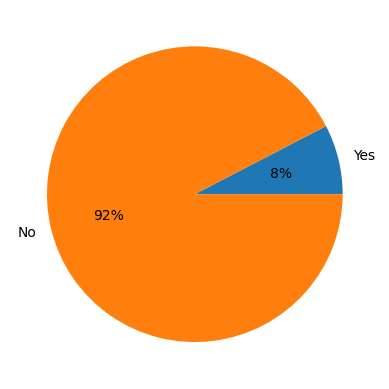

In [110]:
online_y_table = zomato.query('online_order=="Yes" & book_table == "Yes"')
print('Number of resturant having both online and table booking is',online_y_table.shape[0])
plt.pie([online_y_table.shape[0],zomato.shape[0]-online_y_table.shape[0]],labels=['Yes','No'],autopct='%.0f%%')
plt.show()

#### Types of resturants available and their numbers

<BarContainer object of 7 artists>

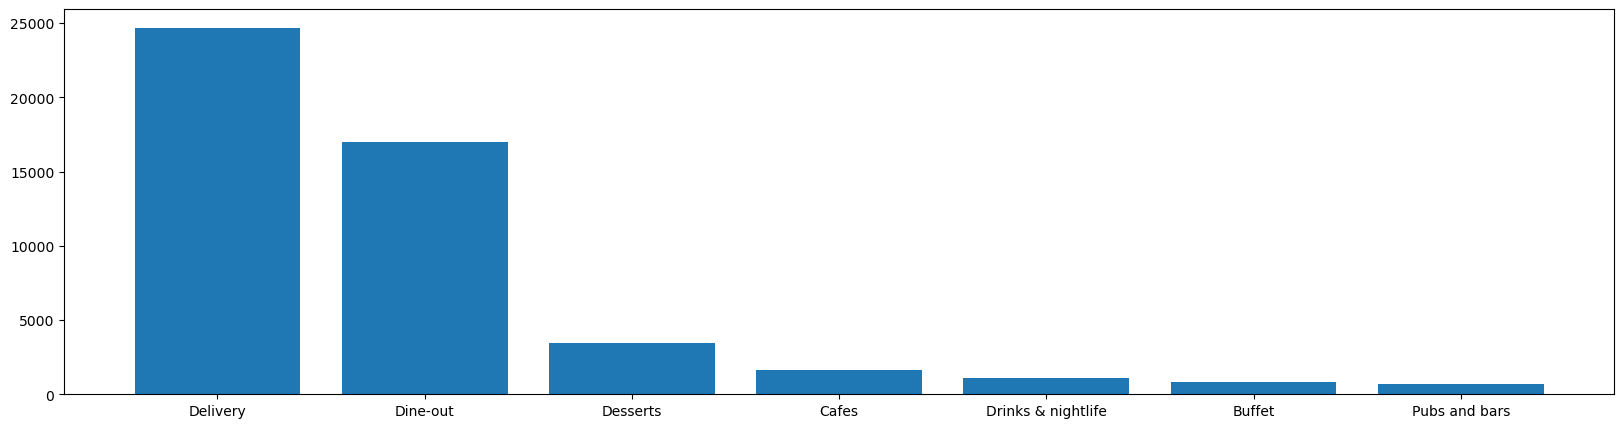

In [111]:
fig=plt.figure(figsize=(20,5))
rest_catag = zomato[['type','name']].groupby('type').count()
rest_catag = rest_catag.reset_index()
rest_catag = rest_catag.sort_values(by ='name',ascending=False)
plt.bar(x=rest_catag['type'],height=rest_catag['name'])

#### Top 20 costliest resturants

In [112]:
costliest = zomato.sort_values(by='cost',ascending=False)
costliest = costliest[['city','name']]
costliest.iloc[:20]

,city,name
19139,Indiranagar,Le Cirque Signature - The Leela Palace
45618,Old Airport Road,Le Cirque Signature - The Leela Palace
40266,Malleshwaram,Royal Afghan - ITC Windsor
41591,Marathahalli,Malties - Radisson Blu
42141,Marathahalli,Malties - Radisson Blu
37715,Lavelle Road,La Brasserie - Le Meridien
40262,Malleshwaram,La Brasserie - Le Meridien
39416,Malleshwaram,La Brasserie - Le Meridien
39125,Lavelle Road,La Brasserie - Le Meridien
6150,Brigade Road,Edo Restaurant & Bar - ITC Gardenia


D:\Anaconda202210\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='cost', ylabel='Density'>

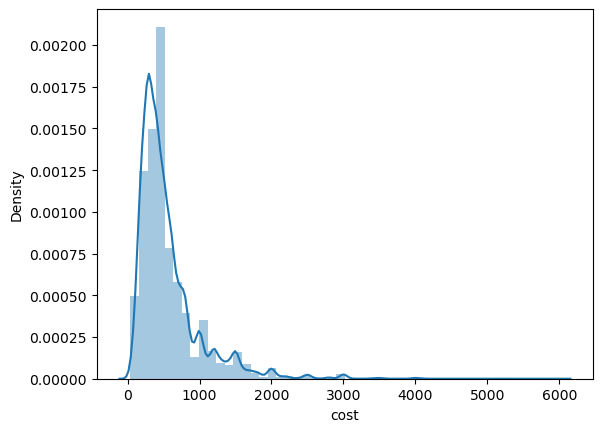

In [113]:
sns.distplot(zomato['cost'])

#### Resturants with rating 

In [114]:
Resturant_rating = {}
Resturant_rating['1 to 2'] = zomato[zomato['rate'] < 2 ].shape[0]
Resturant_rating['2 to 3'] = zomato[(zomato['rate'] < 3) & (zomato['rate'] > 2) ].shape[0]
Resturant_rating['3 to 4'] = zomato[(zomato['rate'] < 4) & (zomato['rate'] > 3) ].shape[0]
Resturant_rating['4 to 5'] = zomato[(zomato['rate'] < 5) & (zomato['rate'] > 4) ].shape[0]


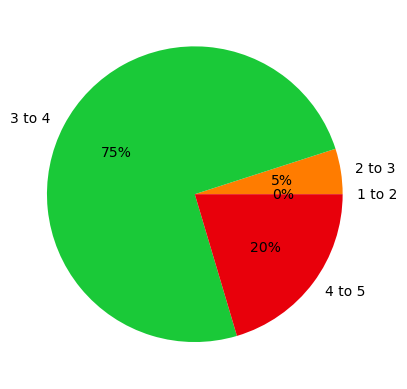

In [115]:
colors = sns.color_palette('bright')[0:4]
plt.pie(Resturant_rating.values(),labels =Resturant_rating.keys(),colors = colors,autopct = '%.f%%')
plt.show()

In [116]:
zomato['rate'].unique()

array([4.1       , 3.8       , 3.7       , 3.6       , 4.6       ,
       4.        , 4.2       , 3.9       , 3.1       , 3.        ,
       3.2       , 3.3       , 2.8       , 4.4       , 4.3       ,
       2.9       , 3.5       , 3.70044882, 2.6       , 3.4       ,
       4.5       , 2.5       , 2.7       , 4.7       , 2.4       ,
       2.2       , 2.3       , 4.8       , 4.9       , 2.1       ,
       2.        , 1.8       ])

#### Different cusines resturants already available

In [117]:
import re

zomato.index=range(zomato.shape[0])
cusine=set()
for i in range(zomato.shape[0]):
    array_split=re.split(',',zomato['cuisines'][i])
    for item in array_split:
        cusine.add(item.strip())
print(cusine)

{'Vegan', 'German', 'Vietnamese', 'Konkan', 'Japanese', 'Ice Cream', 'Mediterranean', 'Burmese', 'Gujarati', 'Pan Asian', 'Finger Food', 'Pizza', 'Burger', 'Kerala', 'Arabian', 'Coffee', 'South Indian', 'Kebab', 'Australian', 'Charcoal Chicken', 'Indonesian', 'Goan', 'Juices', 'Mangalorean', 'Lucknowi', 'Tamil', 'Oriya', 'Mithai', 'Portuguese', 'Cantonese', 'Modern Indian', 'Singaporean', 'Tea', 'Wraps', 'Tex-Mex', 'British', 'Sushi', 'Paan', 'Continental', 'Mexican', 'Nepalese', 'Mughlai', 'American', 'Korean', 'Sindhi', 'Awadhi', 'Rolls', 'Bubble Tea', 'Greek', 'Drinks Only', 'Biryani', 'Desserts', 'Middle Eastern', 'BBQ', 'South American', 'Malwani', 'Hot dogs', 'Jewish', 'Russian', 'Naga', 'Healthy Food', 'Maharashtrian', 'Bihari', 'Sandwich', 'Mongolian', 'Beverages', 'Raw Meats', 'Thai', 'Kashmiri', 'African', 'Afghani', 'Steak', 'Malaysian', 'Chinese', 'Bohri', 'Cafe', 'Roast Chicken', 'Hyderabadi', 'North Indian', 'Chettinad', 'Assamese', 'Spanish', 'Momos', 'Salad', 'Sri Lanka

#### Fininding most liked dishes

In [118]:
zomato['dish_liked'] = zomato['dish_liked'].apply(lambda x: str(x).replace('nan','No Special Dish'))

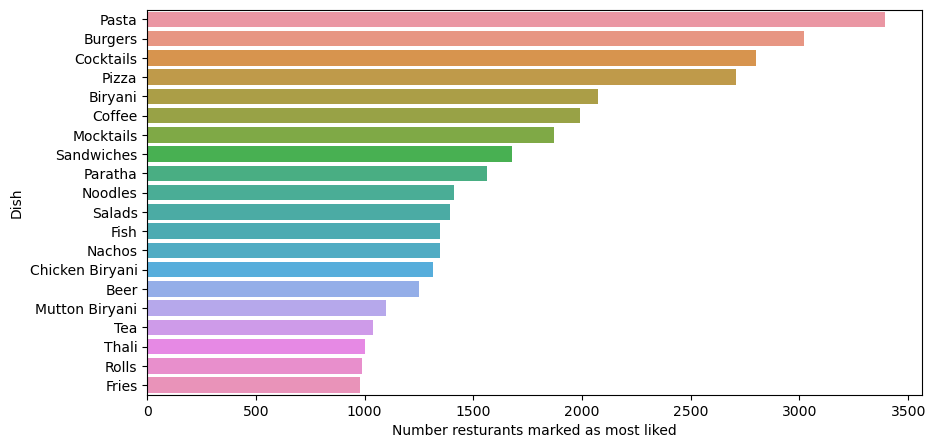

In [119]:
mostliked = []
for i in range(zomato.shape[0]):
    if zomato['dish_liked'][i] != 'No Special Dish':
        array_split=re.split(',',zomato['dish_liked'][i])
        for item in array_split:
            mostliked.append(item.strip())
    else:
        continue

mostliked_ser = pd.Series(mostliked)
fig=plt.figure(figsize=(10,5))
sns.barplot(y=mostliked_ser.value_counts()[0:20].index,x=mostliked_ser.value_counts()[0:20])
plt.xlabel('Number resturants marked as most liked')
plt.ylabel('Dish')
plt.show()

## Machine Learning Model

#### Let's start building our ML model. First we need to get all the required columns for our model.

In [120]:
df = zomato.iloc[:,[3,4,5,6,9,11,12,14,15,16]]
df.head()

,online_order,book_table,rate,votes,rest_type,cuisines,cost,menu_item,type,city
0,Yes,Yes,4.1,775,Casual Dining,"North Indian, Mughlai, Chinese",800.0,[],Buffet,Banashankari
1,Yes,No,4.1,787,Casual Dining,"Chinese, North Indian, Thai",800.0,[],Buffet,Banashankari
2,Yes,No,3.8,918,"Cafe, Casual Dining","Cafe, Mexican, Italian",800.0,[],Buffet,Banashankari
3,No,No,3.7,88,Quick Bites,"South Indian, North Indian",300.0,[],Buffet,Banashankari
4,No,No,3.8,166,Casual Dining,"North Indian, Rajasthani",600.0,[],Buffet,Banashankari


In [121]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49395 entries, 0 to 49394
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   online_order  49395 non-null  object 
 1   book_table    49395 non-null  object 
 2   rate          49395 non-null  float64
 3   votes         49395 non-null  int64  
 4   rest_type     49191 non-null  object 
 5   cuisines      49395 non-null  object 
 6   cost          49395 non-null  float64
 7   menu_item     49395 non-null  object 
 8   type          49395 non-null  object 
 9   city          49395 non-null  object 
dtypes: float64(2), int64(1), object(7)
memory usage: 3.8+ MB


#### We have 5 columns whose data type is object. Lets use encoding to make them ready to train the model

In [122]:
le = LabelEncoder()
for col in df.columns:
    if df[col].dtype == 'O':
        df[col] = le.fit_transform(df[col])
        

C:\Users\SarojRakesh\AppData\Local\Temp\ipykernel_16216\2228221636.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = le.fit_transform(df[col])


In [123]:
df.head(10)

,online_order,book_table,rate,votes,rest_type,cuisines,cost,menu_item,type,city
0,1,1,4.1,775,27,2091,800.0,8778,0,1
1,1,0,4.1,787,27,922,800.0,8778,0,1
2,1,0,3.8,918,22,743,800.0,8778,0,1
3,0,0,3.7,88,78,2469,300.0,8778,0,1
4,0,0,3.8,166,27,2119,600.0,8778,0,1
5,1,0,3.8,286,27,1761,600.0,8778,0,1
6,0,0,3.6,8,27,2139,800.0,8778,0,1
7,1,1,4.6,2556,29,2246,600.0,8778,1,1
8,1,0,4.0,324,19,719,700.0,8778,1,1
9,1,0,4.2,504,19,744,550.0,8778,1,1


#### Finding if any null values still present in our dataset

In [124]:
df.isnull().sum()

online_order    0
book_table      0
rate            0
votes           0
rest_type       0
cuisines        0
cost            0
menu_item       0
type            0
city            0
dtype: int64

#### There are some null values present in 'rest_type' columns. Lets fix those.

In [125]:
df = df.dropna(subset = 'rest_type')

Saving our datset with required columns for future tasks

In [133]:
df.to_csv('Zomato_Ready.csv')

#### Let's build our model and train them

In [126]:
X = df.drop('rate',axis=1)
y = df['rate']

In [127]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=140)

### Model - Linear Regression

In [128]:
le_model = LinearRegression()
le_model.fit(X_train,y_train)
y_pred = le_model.predict(X_test)
r2_score(y_test,y_pred)

0.268106086849784

### Model - Decision Tree

In [129]:
dt_model = DecisionTreeRegressor()
dt_model.fit(X_train,y_train)
y_pred = dt_model.predict(X_test)
r2_score(y_test,y_pred)

0.783783523698153

### Model - Random Forest

In [130]:
rf_model = RandomForestRegressor(n_estimators=550,min_samples_leaf=.0001, random_state=120)
rf_model.fit(X_train,y_train)
y_pred = rf_model.predict(X_test)
r2_score(y_test,y_pred)

0.8207852953841392

### Model - Extra Trees

In [131]:
et_model = ExtraTreesRegressor(n_estimators=150)
et_model.fit(X_train,y_train)
y_pred = et_model.predict(X_test)
r2_score(y_test,y_pred)

0.8863903828884748

#### From above we can clearly see that Extra trees regressor model perform better that other models. Let's consider this model for our predictions. Saving the model.

In [132]:
import pickle

pickle.dump(et_model,open('model.pkl','wb'))
model = pickle.load(open('model.pkl','rb'))